In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Sample historical price data (daily returns)
# Replace this with your actual financial data
prices = pd.Series([100.0, 101.5, 99.8, 102.2, 98.6, 101.7, 100.3, 98.9, 102.5, 101.0])
prices

0    100.0
1    101.5
2     99.8
3    102.2
4     98.6
5    101.7
6    100.3
7     98.9
8    102.5
9    101.0
dtype: float64

In [4]:
# Define the confidence level and investment horizon
confidence_level = 0.95  # 95% confidence level
investment_horizon = 1  # 1-day VaR

In [11]:
# Calculate daily returns from prices
returns = prices.pct_change().dropna()
returns

1    0.015000
2   -0.016749
3    0.024048
4   -0.035225
5    0.031440
6   -0.013766
7   -0.013958
8    0.036400
9   -0.014634
dtype: float64

In [12]:
# Calculate the VaR using historical simulation
historical_var = -np.percentile(returns, 100 * confidence_level)
historical_var

0.027834536743370056

In [13]:
# Calculate the VaR for the investment horizon
var = historical_var * np.sqrt(investment_horizon)
var

0.027834536743370056

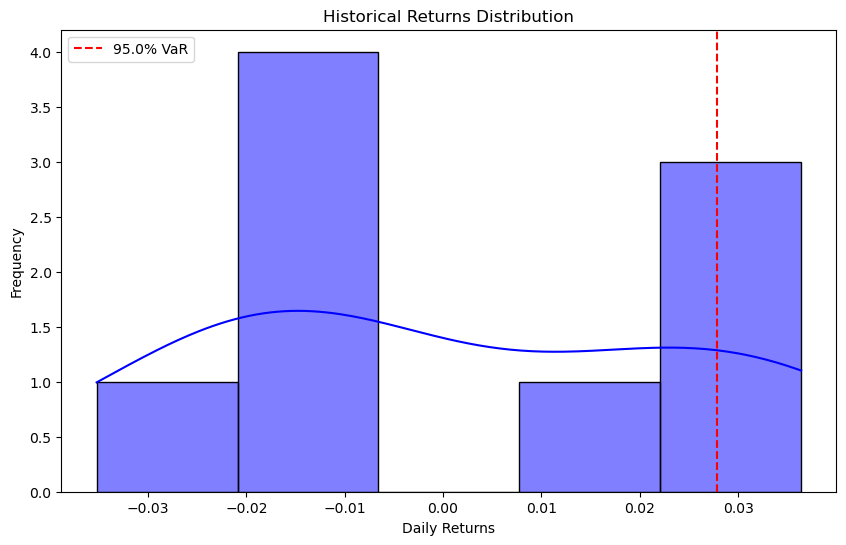

In [14]:
# Create a histogram of returns
plt.figure(figsize=(10, 6))
sns.histplot(returns, kde=True, color='b')
plt.title('Historical Returns Distribution')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.axvline(x=var, color='r', linestyle='--', label=f'{confidence_level * 100}% VaR')
plt.legend()
plt.show()

In [15]:
# Print the VaR
print(f"{confidence_level * 100}% VaR over {investment_horizon}-day period: {var:.2f}%")

95.0% VaR over 1-day period: 0.03%
